UNAD

Diana Marcela Castiblanco Sanchez

Agrupamiento en K-means

Grupo 202016908_35

In [53]:
import pandas as pd
import warnings  # Para deshabilitar las advertencias
import numpy as np  # Para operaciones numéricas

# Cargar los datos del archivo CSV
file_path = 'Mall_Customers.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas y la información general del dataset
print(data.head())
print(data.info())
print(data.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

In [31]:
#Procesamiento de los datos
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Codificación de la variable categórica 'Gender'
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Normalización de las variables numéricas
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Crear un nuevo DataFrame con las características escaladas
scaled_data = pd.DataFrame(scaled_features, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
# Agregar la columna de género ya codificada
scaled_data['Gender'] = data['Gender'] 

# Mostrar las primeras filas del nuevo dataset preparado
print(scaled_data.head())
print(scaled_data.describe())

        Age  Annual Income (k$)  Spending Score (1-100)  Gender
0 -1.424569           -1.738999               -0.434801       1
1 -1.281035           -1.738999                1.195704       1
2 -1.352802           -1.700830               -1.715913       0
3 -1.137502           -1.700830                1.040418       0
4 -0.563369           -1.662660               -0.395980       0
                Age  Annual Income (k$)  Spending Score (1-100)      Gender
count  2.000000e+02        2.000000e+02            2.000000e+02  200.000000
mean  -1.021405e-16       -2.131628e-16           -1.465494e-16    0.440000
std    1.002509e+00        1.002509e+00            1.002509e+00    0.497633
min   -1.496335e+00       -1.738999e+00           -1.910021e+00    0.000000
25%   -7.248436e-01       -7.275093e-01           -5.997931e-01    0.000000
50%   -2.045351e-01        3.587926e-02           -7.764312e-03    0.000000
75%    7.284319e-01        6.656748e-01            8.851316e-01    1.000000
max    2

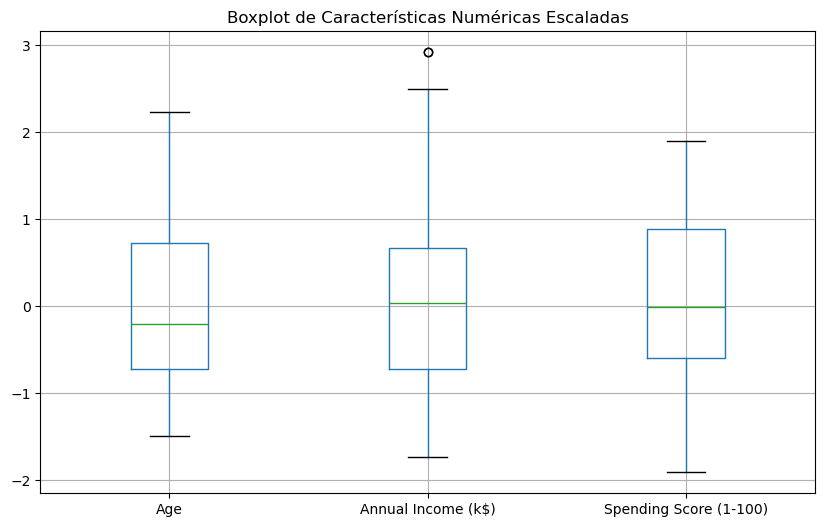

In [33]:
#analisis de datos atípicos
import matplotlib.pyplot as plt

# Crear boxplots para cada característica numérica
plt.figure(figsize=(10, 6))
scaled_data.boxplot(column=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.title('Boxplot de Características Numéricas Escaladas')
plt.show()

In [35]:
#Clusterin Jerárcico y evaluación
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Configuración del modelo de clustering jerárquico
num_clusters = 5
hierarchical_model = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='ward')

# Ajustar el modelo a los datos
cluster_labels = hierarchical_model.fit_predict(scaled_data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Evaluación del modelo utilizando el coeficiente de Silhouette
silhouette_avg = silhouette_score(scaled_data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']], cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3477559149875169


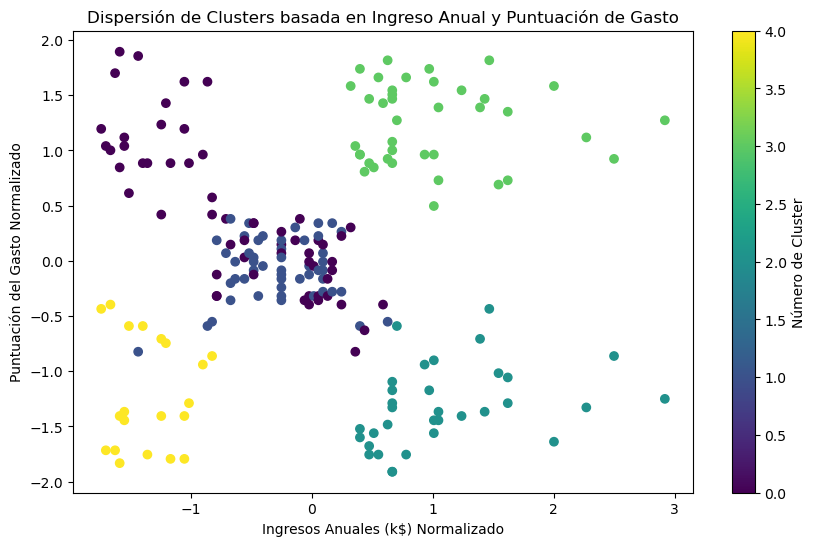

In [39]:
#Visualizacion de cluster
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data['Annual Income (k$)'], scaled_data['Spending Score (1-100)'], c=cluster_labels, cmap='viridis', marker='o')
plt.title('Dispersión de Clusters basada en Ingreso Anual y Puntuación de Gasto')
plt.xlabel('Ingresos Anuales (k$) Normalizado')
plt.ylabel('Puntuación del Gasto Normalizado')
plt.colorbar(label='Número de Cluster')
plt.show()

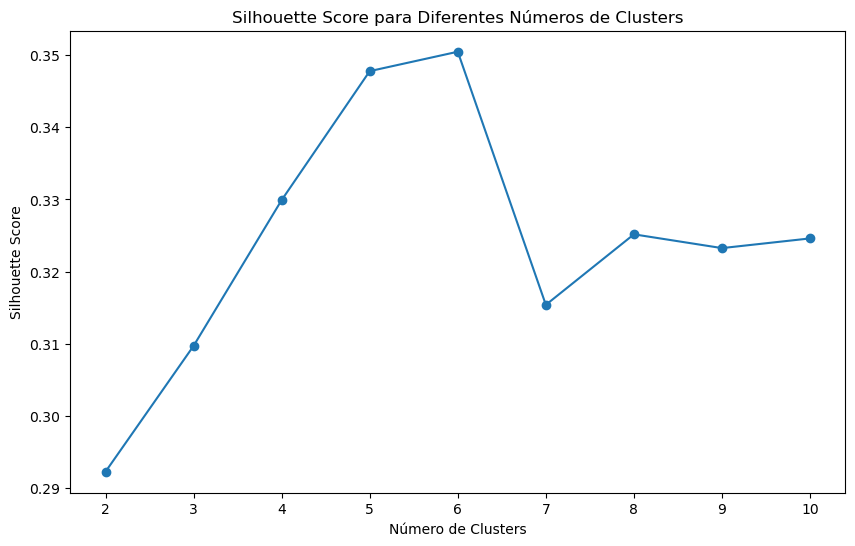

In [41]:
#analisis de la idoneidad de diferentes numeros de cluster
# Explorar diferentes números de clusters y calcular el Silhouette score para cada uno
silhouette_scores = []
cluster_options = range(2, 11)  # Explorar entre 2 y 10 clusters

for n_clusters in cluster_options:
    model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    labels = model.fit_predict(scaled_data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    score = silhouette_score(scaled_data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']], labels)
    silhouette_scores.append(score)

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.plot(cluster_options, silhouette_scores, marker='o')
plt.title('Silhouette Score para Diferentes Números de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_options)
plt.show()

In [43]:
#Procediendo con el Análisis Detallado de Clusters
# Elegir un número óptimo de clusters basado en el análisis anterior (suponiendo que es 5)
optimal_clusters = 5
final_model = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
final_labels = final_model.fit_predict(scaled_data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Agregar las etiquetas del cluster al DataFrame para un análisis detallado
scaled_data['Cluster'] = final_labels

# Calcular las estadísticas descriptivas para cada cluster
cluster_summary = scaled_data.groupby('Cluster').mean()
print(cluster_summary)

              Age  Annual Income (k$)  Spending Score (1-100)    Gender
Cluster                                                                
0       -0.927151           -0.593258                0.400531  0.344828
1        1.156161           -0.264896               -0.076090  0.500000
2        0.186920            1.089009               -1.320639  0.545455
3       -0.441917            0.991583                1.239503  0.461538
4        0.351657           -1.347763               -1.209292  0.350000


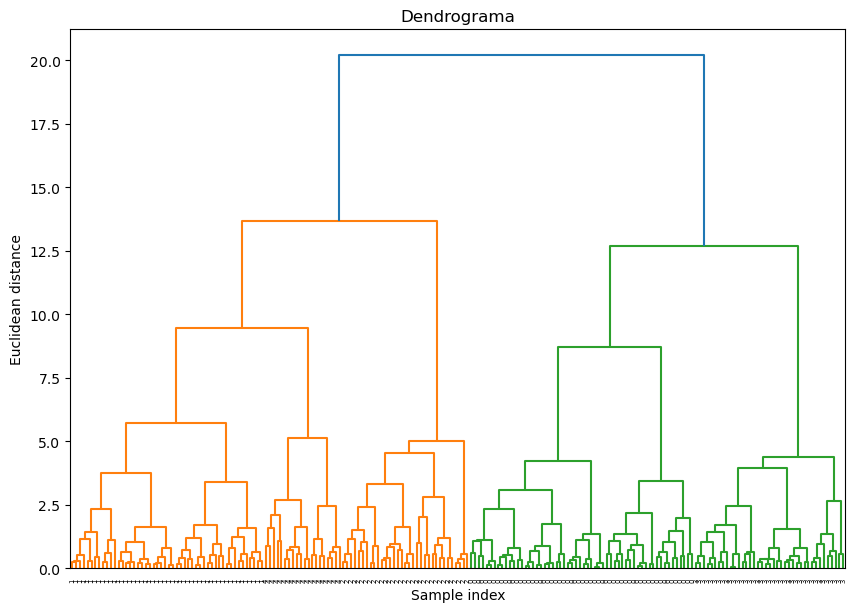

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Preparar los datos para el dendrograma
linked = linkage(scaled_data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']], method='ward')

# Crear el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=cluster_labels.astype(str),
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

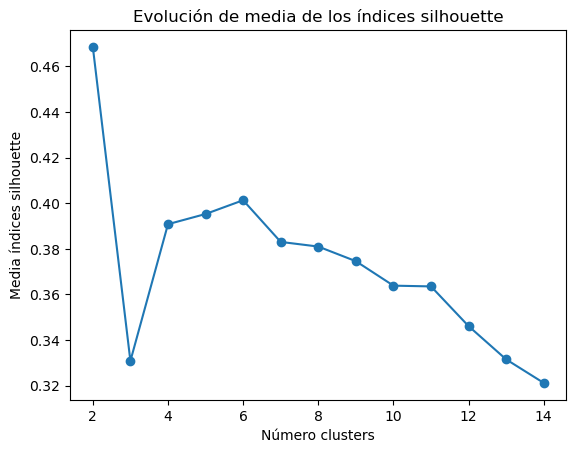

In [55]:
# Deshabilitar las advertencias de FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)
# Lee los datos desde un archivo CSV
data = pd.read_csv('Mall_Customers.csv')

# Asumiendo que 'data' es un DataFrame de pandas
X = data[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Ajuste del rango de clusters
range_n_clusters = range(2, min(15, len(X)))

valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    # Definir y ajustar el modelo de clustering
    modelo = AgglomerativeClustering(
        metric='euclidean',
        linkage='ward',
        n_clusters=n_clusters
    )
    cluster_labels = modelo.fit_predict(X)
    
    if len(np.unique(cluster_labels)) > 1:
        # Calcular el índice silhouette para cada cluster
        silhouette_avg = silhouette_score(X, cluster_labels)
        valores_medios_silhouette.append(silhouette_avg)

# Graficar la evolución de la media de los índices silhouette
plt.plot(range_n_clusters, valores_medios_silhouette, marker='o')
plt.title("Evolución de media de los índices silhouette")
plt.xlabel('Número clusters')
plt.ylabel('Media índices silhouette')
plt.show()